<a href="https://colab.research.google.com/github/Ajay07pandey/Retail-sale-prediction-of-a-drug-store./blob/main/Retail_sale_pridiction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Retail sale pridiction of a drug store**



##### **Project Type**    - **Regression**
##### **Contribution**    - **Individual**
#####           **Ajay pandey**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Rossmann operates over 3,000 drug stores in 7 European countries. Currently,
Rossmann store managers are tasked with predicting their daily sales for up
to six weeks in advance. Store sales are influenced by many factors, including
promotions, competition, school and state holidays, seasonality, and locality.
With thousands of individual managers predicting sales based on their unique
circumstances, the accuracy of results can be quite varied. You are provided
with historical sales data for 1,115 Rossmann stores. The task is to forecast the
"Sales" column for the test set. Note that some stores in the dataset were
temporarily closed for refurbishmen.**

# **Data fields** 


### **Rossmann Stores Data.csv** - historical data including Sales
### **store.csv**  - supplemental information about the stores

### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### **Id** - an Id that represents a store.
* #### **Store** - a unique Id for each store
* #### **Sales** - the turnover for any given day (this is what we are predicting)
* #### **Customers** - the number of customers on a given day
* #### **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
* #### **StateHoliday** - indicates a state holiday. here we have given the dataset of europe so holidays are a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### **SchoolHoliday** - indicates the school holiday. 0 = no holiday, 1 = holiday
* #### **StoreType** - differentiates between 4 different store models: a , b, c, d (By the level of 
* #### **Assortment** - describes an assortment level: **a = basic, b = extra, c = extended**
* #### **CompetitionDistance** - distance in meters to the nearest competitor store
* #### **CompetitionOpendurationSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened
* #### **Promo** - indicates whether a store is running a promo on that day
* #### **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### **Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2
* #### **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries for visualisation 
import numpy as np
from numpy import math 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

#importing basic library for pridiction 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# loading Rossman dataset
rm_df = pd.read_csv('/content/drive/MyDrive/Capstone project/Retail sales prediction (ML)/Rossmann Stores Data.csv')

In [4]:
# loading Store dataset
store_df = pd.read_csv('/content/drive/MyDrive/Capstone project/Retail sales prediction (ML)/store.csv')

### Dataset First View

In [5]:
# Dataset First Look
rm_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [7]:
# Rossmann Dataset Rows & Columns count
rm_df.shape

(1017209, 9)

In [8]:
#store rows and column count
store_df.shape

(1115, 10)

### Dataset Information

In [9]:
# Dataset Info
rm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [11]:
# Describe Rossman data set
rm_df.describe(include = 'all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [12]:
# describe storedata set 
store_df.describe(include = 'all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


#### Duplicate Values

In [13]:
store_df.duplicated().any()

False

In [14]:
# Dataset Duplicate Value Count
rm_df.duplicated().sum()

0

In [15]:
rm_df.duplicated().any()

False

In [16]:
# Store duplicate values count
store_df.duplicated().sum()

0

Great!!! we don't have duplicate values in our data set

#### Missing Values/Null Values

In [17]:
# Missing Values/Null Values Count

In [18]:
store_df.isnull().any()

Store                        False
StoreType                    False
Assortment                   False
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool

In [19]:
rm_df.isnull().any()

Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

In [20]:
rm_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [21]:
null = store_df.isnull().sum() 
null

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

## Visualization of nan values

We do visualization of missing values with the help of **Missingno library** which is specially designed for Nan values.

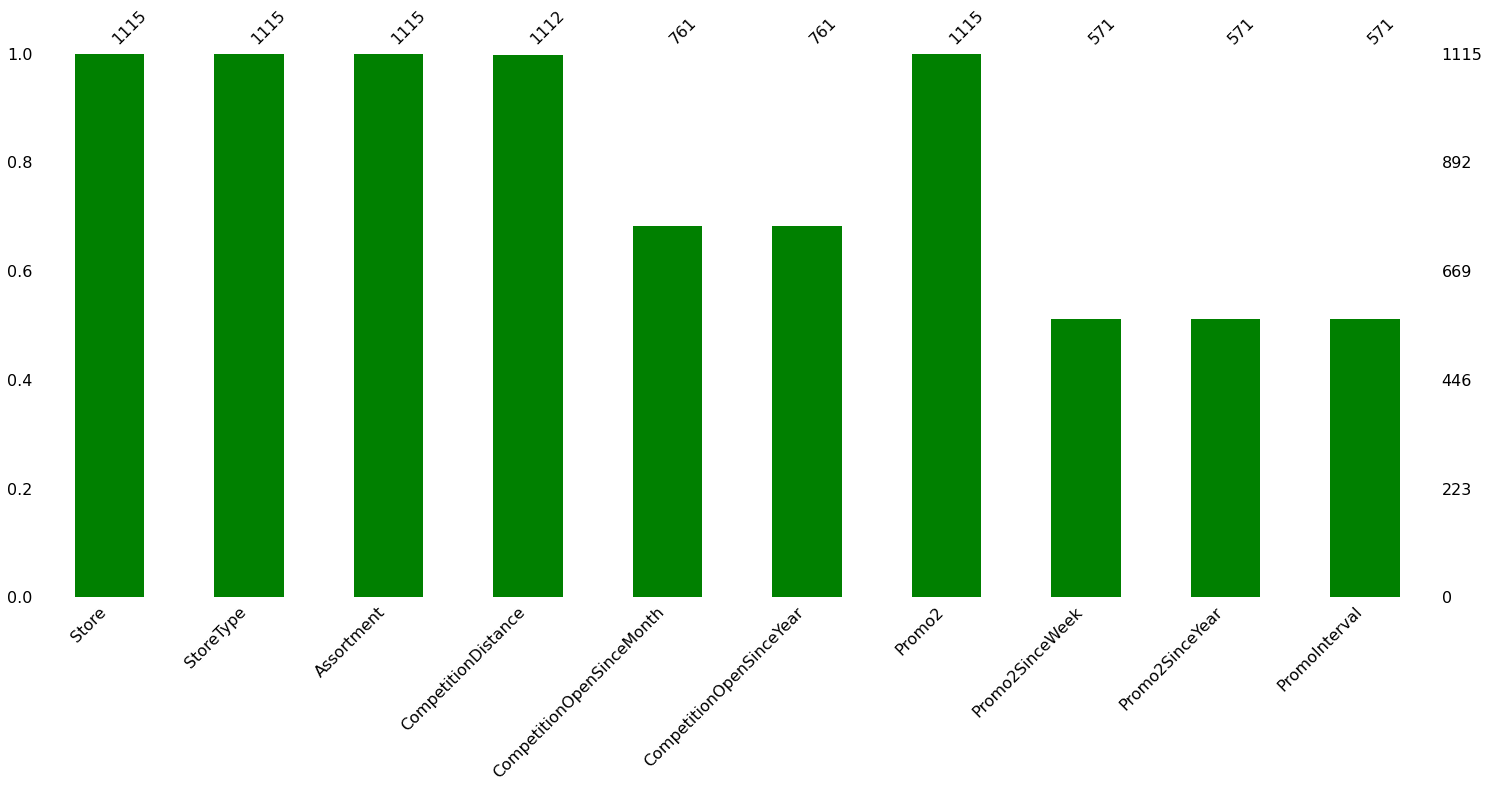

In [22]:
# Visualization of missing values with the help of Bar plot
plt.figure(figsize=(15,8))
import missingno as msno
msno.bar(store_df, color='green')

For more clear understanding now we draw **Heat Map**

<Figure size 1080x576 with 0 Axes>

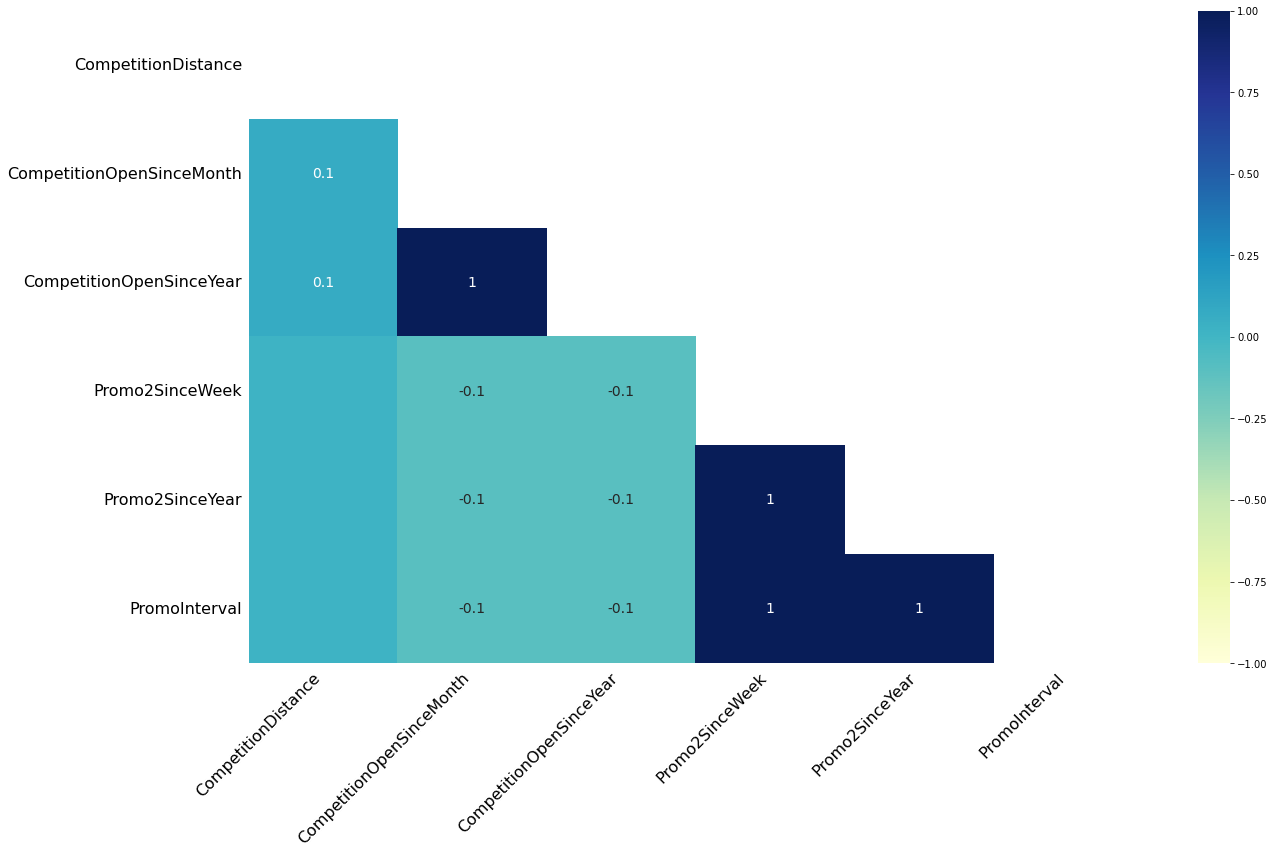

In [23]:
plt.figure(figsize=(15,8))
msno.heatmap(store_df, cmap='YlGnBu')

In [24]:
## Now checking Nan values are present or not.
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Now we dont nave Nan values so we can proceed 

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [25]:
# Dataset Columns
rm_df.columns


Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [26]:
# Columns in store data frame
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [27]:
# Dataset Describe
rm_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [28]:
# store data set 
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [29]:
from scipy.stats.morestats import unique
# checking for unique values in Rosseman data set.
list_of_variables = rm_df.columns.to_list()

# Lets create a function to check unique values.
for i in list_of_variables :
  print('The unique values in the', i , 'are' , rm_df[i].unique())


The unique values in the Store are [   1    2    3 ... 1113 1114 1115]
The unique values in the DayOfWeek are [5 4 3 2 1 7 6]
The unique values in the Date are ['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '2015-06-11' '2015-06-10' '2015-06-09' '2015-06-08' '2015-06-07'
 '2015-06-06' '2015-06-05' '2015-06-04' '2015-06-03' '2015-06-02'
 '2015-06-01' '2015-05-31' '2015-05-30' '2015-05

In [30]:
variables = store_df.columns.to_list()

# Lets create a function to check unique values.
for i in variables :
  print('The unique values in the', i , 'are' , store_df[i].unique())

The unique values in the Store are [   1    2    3 ... 1113 1114 1115]
The unique values in the StoreType are ['c' 'a' 'd' 'b']
The unique values in the Assortment are ['a' 'c' 'b']
The unique values in the CompetitionDistance are [1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 4.230e+03 1.090e+03 2.600e+02 1.800e+02 1.180e+03 2.900e+02 4.880e+03
 9.710e+03 2.700e+02 1.060e+03 1.801e+04 6.260e+03 1.057e+04 4.500e+02
 3.036e+04 7.170e+03 7.200e+02 6.620e+03 4.200e+02 7.340e+03 2.840e+03
 5.540e+03 3.500e+02 2.050e+03 3.700e+03 2.256e+04 4.100e+02 2.500e+02
 1.130e+03 4.840e+03 1.750e+04 2.200e+03 1.650e+03 3.300e+02 2.244e+04
 1.996e+04 3.510e+03 3.320e+03 7.910e+03 2.370e+03 2.239e+0

In [31]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

Text(0.5, 1.0, 'Distribution plot')

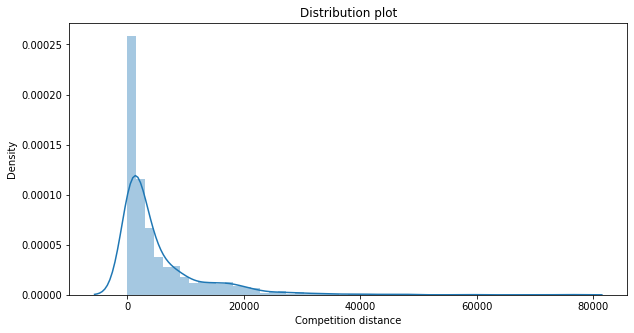

In [32]:
plt.figure(figsize=(10,5))
sns.distplot(x=store_df['CompetitionDistance'])
plt.xlabel('Competition distance')
plt.title('Distribution plot')

Here we can see that the distribution is right skewed so we can take the median value to replace null values of competition distance.

In [33]:
# code for replacing Nan values in CompetitionDistance with mode.
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

Text(0.5, 0, 'Competion open since month')

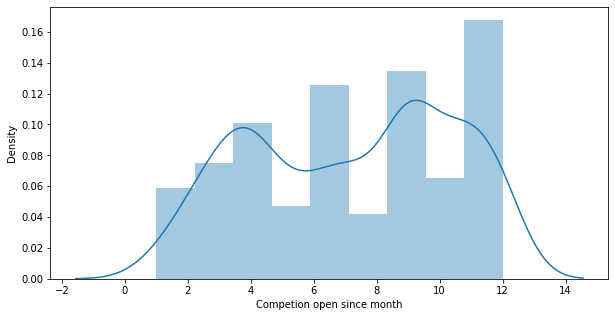

In [34]:
# Visualizing the missing values
plt.figure(figsize=(10,5))
sns.distplot(x=store_df['CompetitionOpenSinceMonth'])
plt.xlabel('Competion open since month')

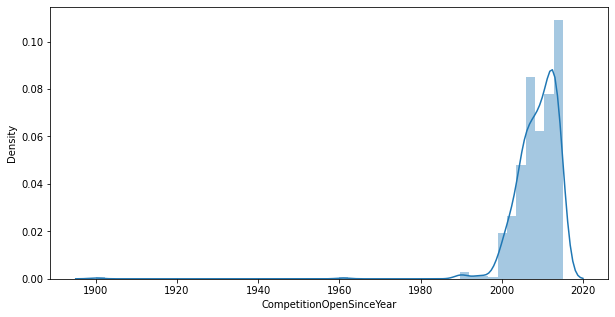

In [35]:
plt.figure(figsize=(10,5))
sns.distplot(store_df['CompetitionOpenSinceYear'])

In [36]:
from statistics import mode
# By seeing the graph we can say that we can replace the null values with mode for competition open since Year/Month.
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)

# same for the competition open since month
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [37]:
# Replacing Nan values with 0 in Promo2SinceWeek
store_df['Promo2SinceWeek'].fillna(store_df['Promo2SinceWeek'].fillna(0) , inplace = True)

# Replacing Nan values with 0 in Promo2SinceYear
store_df['Promo2SinceYear'].fillna(store_df['Promo2SinceYear'].fillna(0) ,inplace = True)

# Replacing Nan values with 0 in PromoInterval
store_df['PromoInterval'].fillna(store_df['PromoInterval'].fillna(0) ,inplace = True)

In [38]:
## Now checking Nan values are present or not.
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [39]:
# Write your code to make your dataset analysis ready.
# Value_counts of StateHoliday Column
rm_df.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [40]:
# Value_counts of StateHoliday Column
rm_df.value_counts()

Store  DayOfWeek  Date        Sales  Customers  Open  Promo  StateHoliday  SchoolHoliday
1      1          2013-01-07  7176   785        1     1      0             1                1
745    5          2015-06-05  7622   711        1     1      0             0                1
                  2015-03-06  7667   738        1     1      0             0                1
                  2015-03-13  6268   668        1     0      0             0                1
                  2015-03-20  7857   725        1     1      0             0                1
                                                                                           ..
372    7          2013-03-03  0      0          0     0      0             0                1
                  2013-03-10  0      0          0     0      0             0                1
                  2013-03-17  0      0          0     0      0             0                1
                  2013-03-24  0      0          0     0      0   

Let's merge the two given datasets By inner join.

In [41]:
# Merging the two dataset 'Rossmann store dataset' and 'Store dataset'
df=rm_df.merge(store_df,how='inner',on='Store')

In [42]:
df["CompetitionDistance"]= df["CompetitionDistance"].astype(int)
df["CompetitionOpenSinceMonth"]= df["CompetitionOpenSinceMonth"].astype(int)
df["CompetitionOpenSinceYear"]= df["CompetitionOpenSinceYear"].astype(int)
df["Promo2SinceWeek"]= df["Promo2SinceWeek"].astype(int)
df["Promo2SinceYear"]= df["Promo2SinceYear"].astype(int)
df["Sales"]= df["Sales"].astype(int)
df["Customers"]= df["Customers"].astype(int)

In [43]:
df['Date']=pd.to_datetime(df['Date'],format="%Y/%m/%d")

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [45]:
# first view of our df dataset
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270,9,2008,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270,9,2008,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270,9,2008,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270,9,2008,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270,9,2008,0,0,0,0


In [46]:
df.isnull().any()

Store                        False
DayOfWeek                    False
Date                         False
Sales                        False
Customers                    False
Open                         False
Promo                        False
StateHoliday                 False
SchoolHoliday                False
StoreType                    False
Assortment                   False
CompetitionDistance          False
CompetitionOpenSinceMonth    False
CompetitionOpenSinceYear     False
Promo2                       False
Promo2SinceWeek              False
Promo2SinceYear              False
PromoInterval                False
dtype: bool

Hence in df data set no null values are there.

In [47]:
# check for duplicates in df df 
df.duplicated().any()

False

In [48]:
# check shape of df df
df.shape

(1017209, 18)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Univeriate Analysis

#### Chart - 1

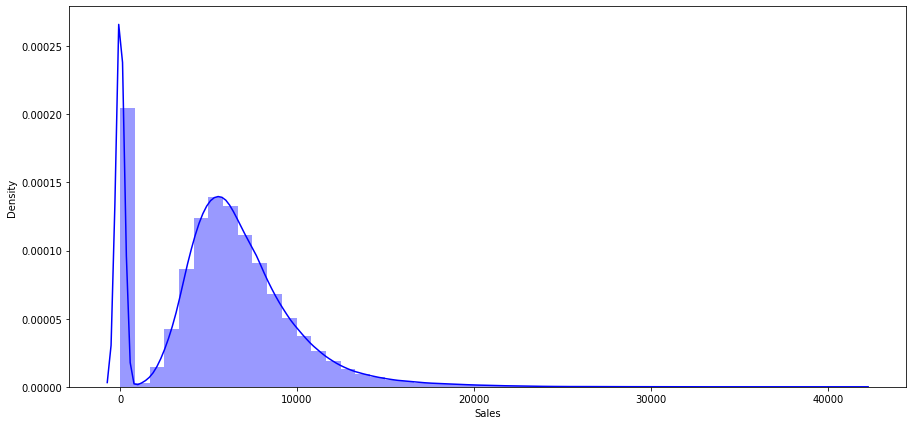

In [ ]:
plt.figure(figsize = (15,7))
sns.distplot (df ['Sales'], color='blue')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

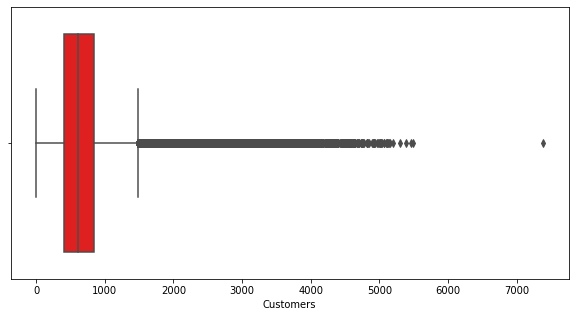

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10,5))
sns.boxplot(df['Customers'], color = 'red' )

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

# plt.figure(figsize=(10,7))
# sns.distplot(df[''],color='purple')
# plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

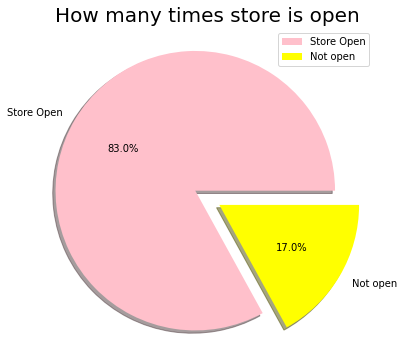

In [ ]:
labels = 'Store Open' , 'Not open'
sizes = df.Open.value_counts()
colors = ['pink', 'yellow']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("How many times store is open",fontsize=20)
plt.legend( labels, loc="best")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

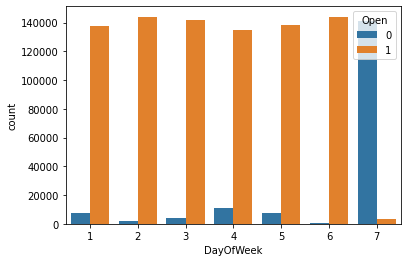

In [ ]:
# Chart - 5 visualization code
sns.countplot(x='DayOfWeek',hue='Open', data = df)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

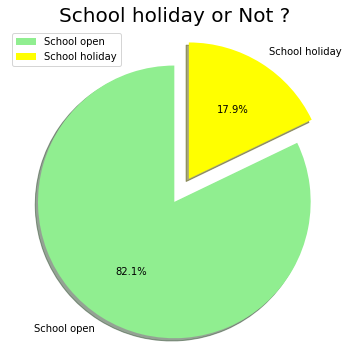

In [ ]:
# Chart - 6 visualization code
labels = 'School open' , 'School holiday'
sizes = df.SchoolHoliday.value_counts()
colors = ['lightgreen', 'yellow']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
          autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend( labels, loc="best")
plt.axis('equal')
plt.title("School holiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

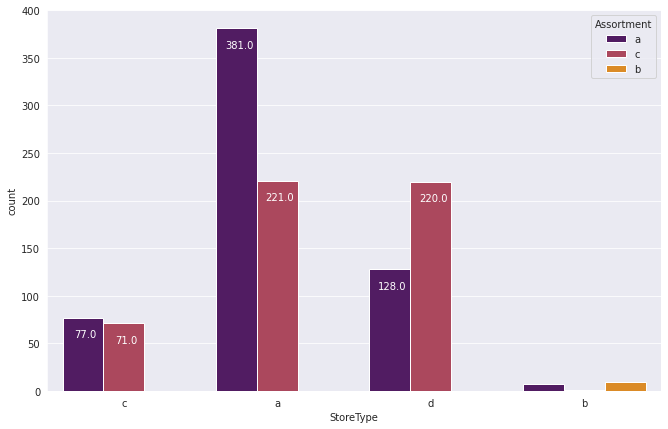

In [ ]:
# Chart - 7 visualization code
#checking stores with their assortment type 
sns.set_style("darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=store_df,palette="inferno")

for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

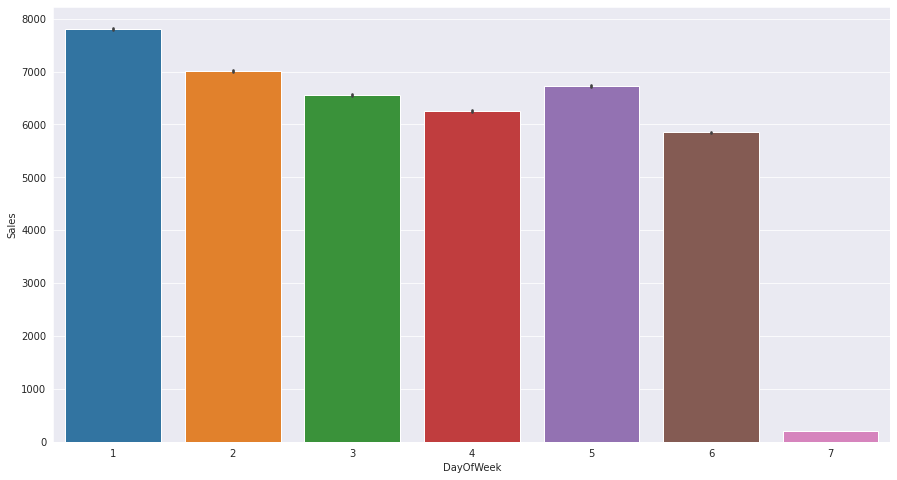

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(15,8))
sns.barplot(x='DayOfWeek', y='Sales' ,data=df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

Text(0.5, 1.0, 'Boxplot For Sales Values')

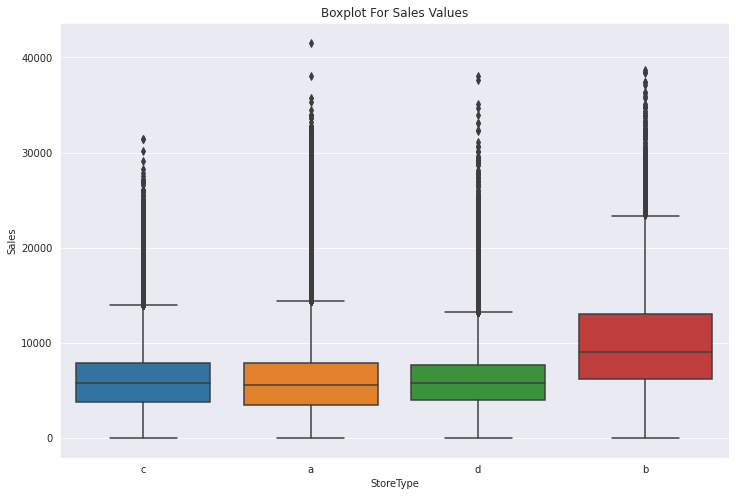

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(12,8))
sns.boxplot(x="StoreType", y="Sales", data=df)
plt.title('Boxplot For Sales Values')

Text(0.5, 1.0, 'Boxplot For Sales  Values on the basis of Assortment Level')

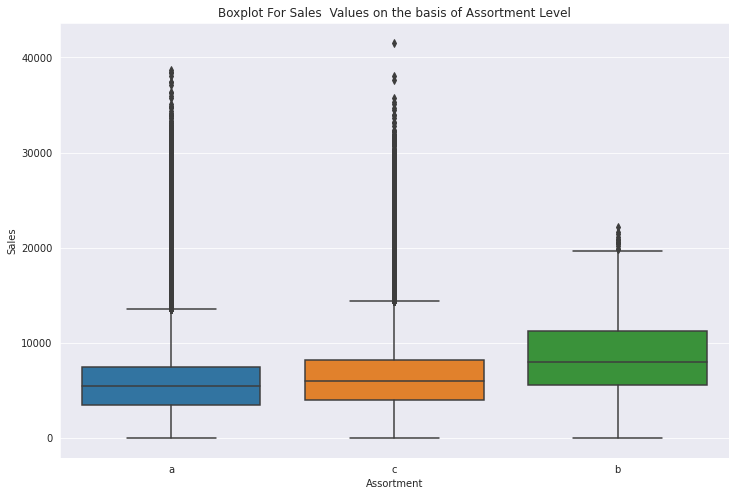

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Assortment", y="Sales", data=df)
plt.title('Boxplot For Sales  Values on the basis of Assortment Level')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## Bivariate analysis.

### Chart 1

In [ ]:
# Sale vs Date 
from datetime import date as dt
Year=df['Date'].dt.year
Month=df['Date'].dt.month
Day=df['Date'].dt.day

(5000.0, 7000.0)

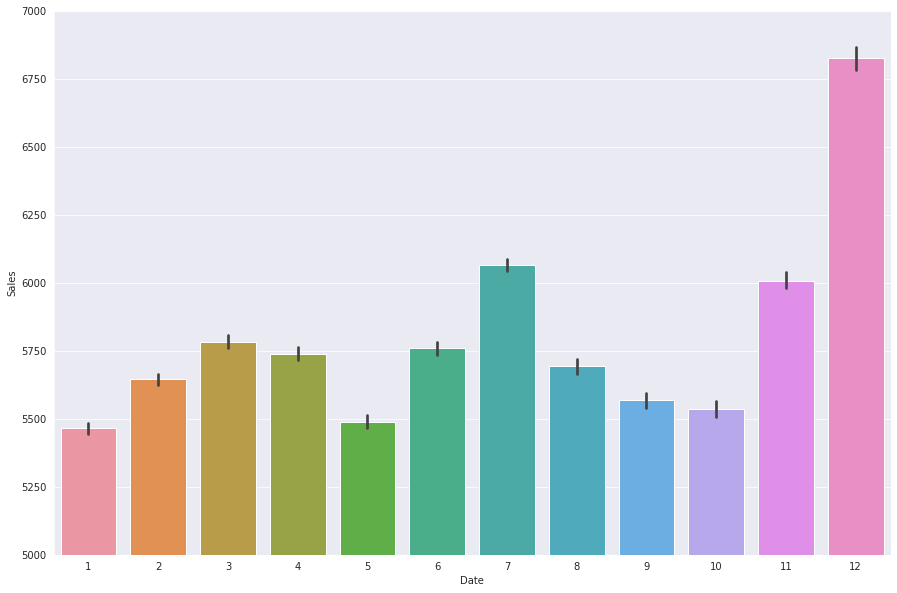

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x = Month , y='Sales' , data = df )
plt.ylim(5000,7000)

(3000.0, 8000.0)

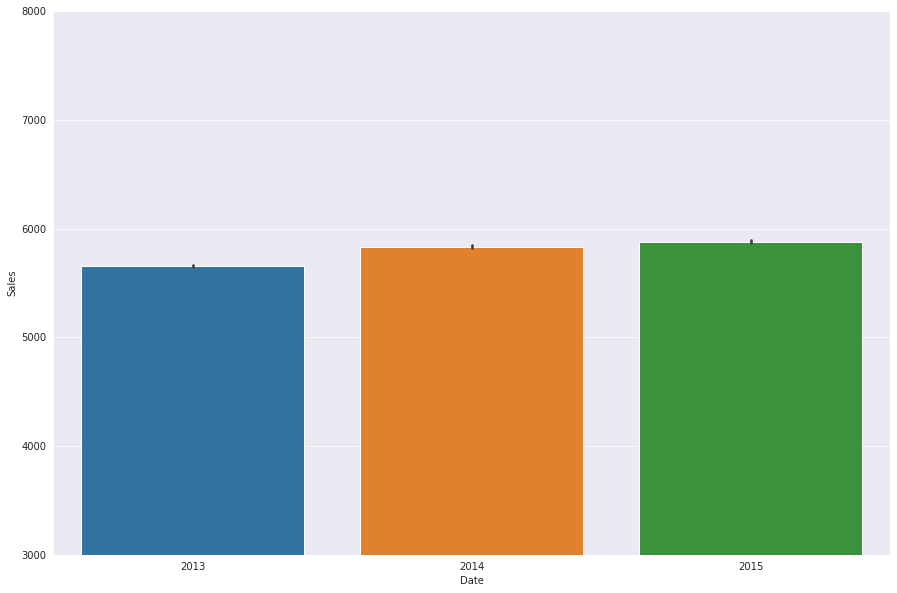

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x= Year , y='Sales' , data = df )
plt.ylim(3000,8000)

(3000.0, 8000.0)

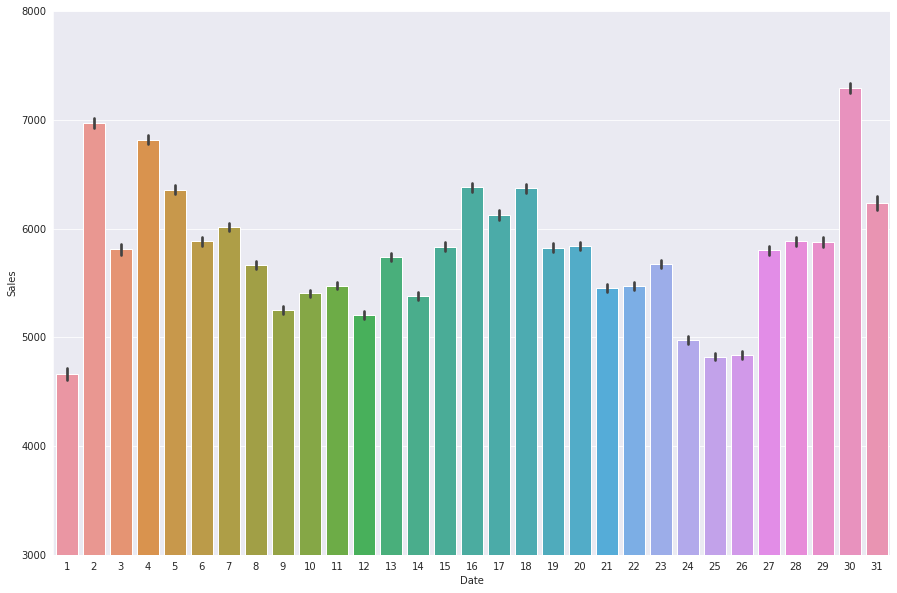

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x= Day , y='Sales' , data = df )
plt.ylim(3000,8000)

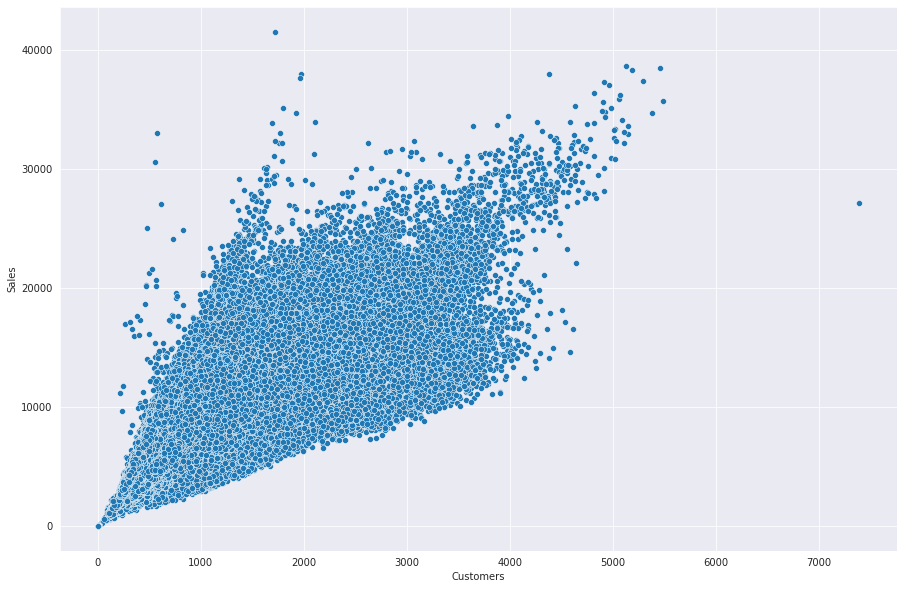

In [ ]:
# Sale Vs Customer
plt.figure(figsize=(15,10))
sns.scatterplot(df['Customers'],df['Sales'])

## Multicolearnity

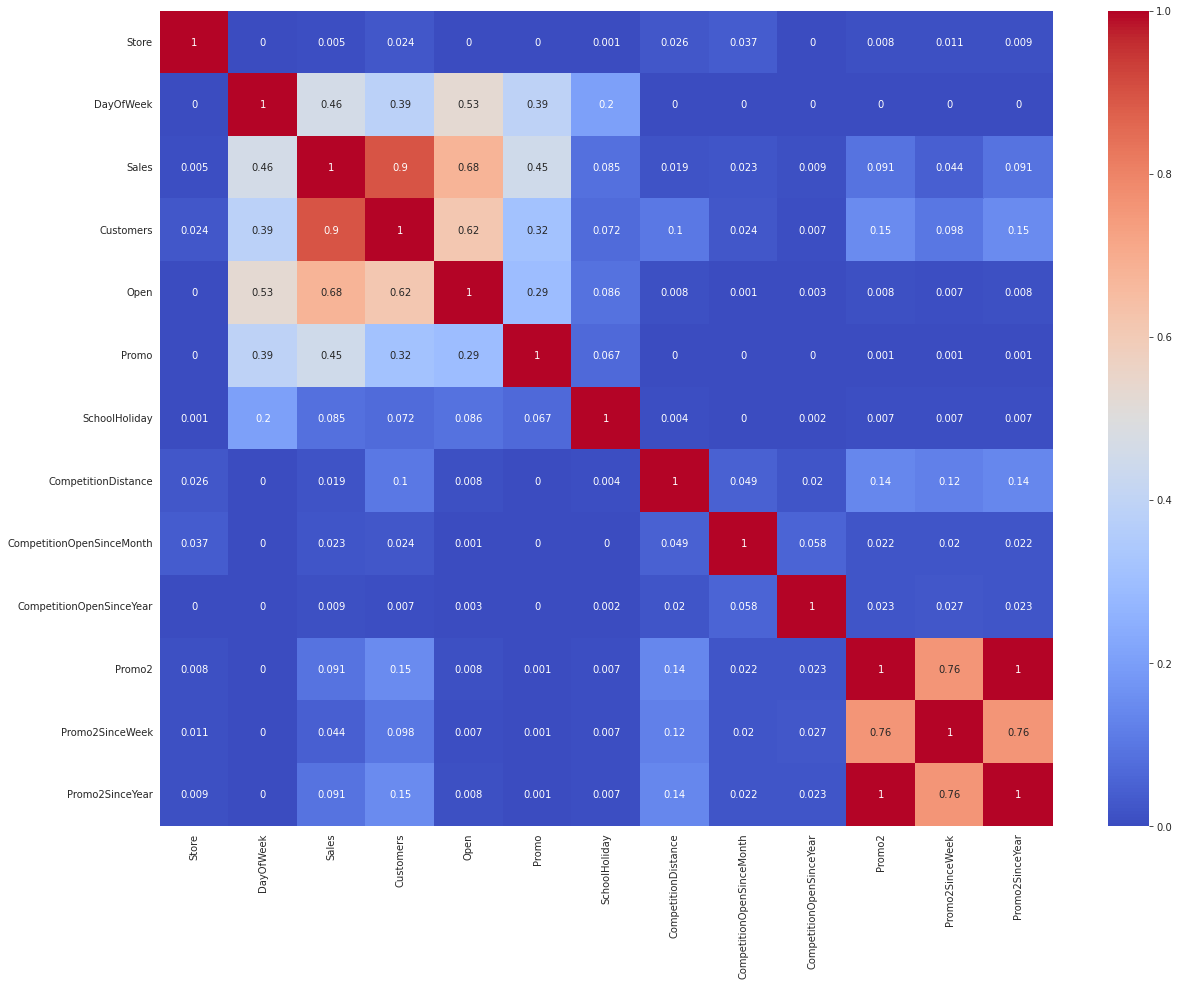

In [ ]:
plt.figure(figsize=(20,15))
correlation = df.corr()
sns.heatmap(abs(round(correlation,3)), annot=True, cmap='coolwarm')
plt.show()

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain df conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [50]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

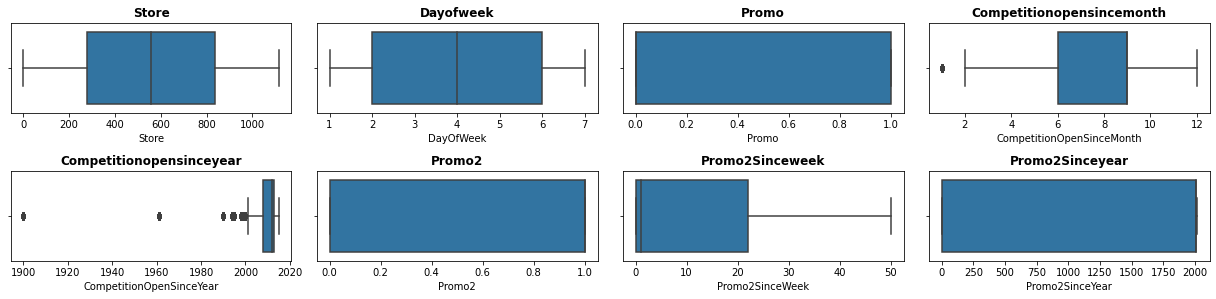

In [52]:
# Checking outliers for numerical columns

numerical_col=['Store','DayOfWeek','Promo','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear']
# 'SchoolHoliday',,'Open' 

plt.figure(figsize=(17,10))
for n,column in enumerate(numerical_col):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

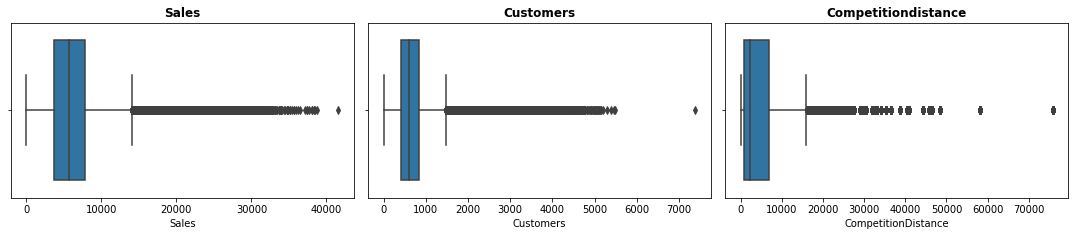

In [53]:
# Checking outliers for continuous columns

continuous_col=['Sales','Customers','CompetitionDistance']

plt.figure(figsize=(20,15))
for n,column in enumerate(continuous_col):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

Here we can observe that there are outliers in various features like:

1. Sales
2. Customers
3. Competition distance
4. CompetitionopensinceYear
5. CompetitionopensinceMonth

In [54]:
# Let's first make a list of columns of numerical and continuous variables containing outliers
outliners = ['Sales', 'Customers', 'CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']

In [55]:
# Knowing the percentage of outliers 

# Let's first make a list of columns of numerical and continuous variables containing outliers
outliners = ['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Sales','Customers']

# defining the code for outlier detection and percentage using IQR.
def detect_outliers(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    print(f"q1:{q1}, q2:{q2}, q3:{q3}")

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(f"Lower bound: {lwr_bound}, Upper bound: {upr_bound}, IQR: {IQR}")

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    len_outliers= len(outliers)
    
    print(f"Total number of outliers are: {len_outliers}")

    print(f"Total percentage of outlier is: {round(len_outliers*100/len(data),2)} %")
    
# Determining IQR, Lower and Upper bound and number out outliers present in each of the continous numerical feature
for feature in outliners:
  print(feature,":")
  detect_outliers(df[feature])
  print("\n")

CompetitionOpenSinceMonth :
q1:6.0, q2:9.0, q3:9.0
Lower bound: 1.5, Upper bound: 13.5, IQR: 3.0
Total number of outliers are: 12452
Total percentage of outlier is: 1.22 %


CompetitionOpenSinceYear :
q1:2008.0, q2:2012.0, q3:2013.0
Lower bound: 2000.5, Upper bound: 2020.5, IQR: 5.0
Total number of outliers are: 27524
Total percentage of outlier is: 2.71 %


Sales :
q1:3727.0, q2:5744.0, q3:7856.0
Lower bound: -2466.5, Upper bound: 14049.5, IQR: 4129.0
Total number of outliers are: 26694
Total percentage of outlier is: 2.62 %


Customers :
q1:405.0, q2:609.0, q3:837.0
Lower bound: -243.0, Upper bound: 1485.0, IQR: 432.0
Total number of outliers are: 38095
Total percentage of outlier is: 3.75 %




In [56]:
# Defining the function that treats outliers with the IQR technique
def treat_outliers_iqr(data):
    # Calculate the first and third quartiles
    q1, q3 = np.percentile(data, [25, 75])
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Identify the outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    # Print the outliers
    print("Outliers:", outliers)
    
    # Treat the outliers (e.g., replace with the nearest quartile value)
    treated_data = [q1 if x < lower_bound else q3 if x > upper_bound else x for x in data]
    treated_data_int = [int(absolute) for absolute in treated_data]
    
    return treated_data

In [57]:
#Passing all the feature one by one from the list of continous_value_feature in our above defined function for outlier treatment
for feature in outliners:
  df[feature]= treat_outliers_iqr(df[feature])

Outliers: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [58]:
# Rechecking the total number of outliers and its percentage present in our dataset.
for feature in outliners:
  print(feature,":")
  detect_outliers(df[feature])
  print("\n")

CompetitionOpenSinceMonth :
q1:6.0, q2:9.0, q3:9.0
Lower bound: 1.5, Upper bound: 13.5, IQR: 3.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


CompetitionOpenSinceYear :
q1:2008.0, q2:2012.0, q3:2013.0
Lower bound: 2000.5, Upper bound: 2020.5, IQR: 5.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Sales :
q1:3727.0, q2:5744.0, q3:7856.0
Lower bound: -2466.5, Upper bound: 14049.5, IQR: 4129.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Customers :
q1:405.0, q2:609.0, q3:837.0
Lower bound: -243.0, Upper bound: 1485.0, IQR: 432.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %




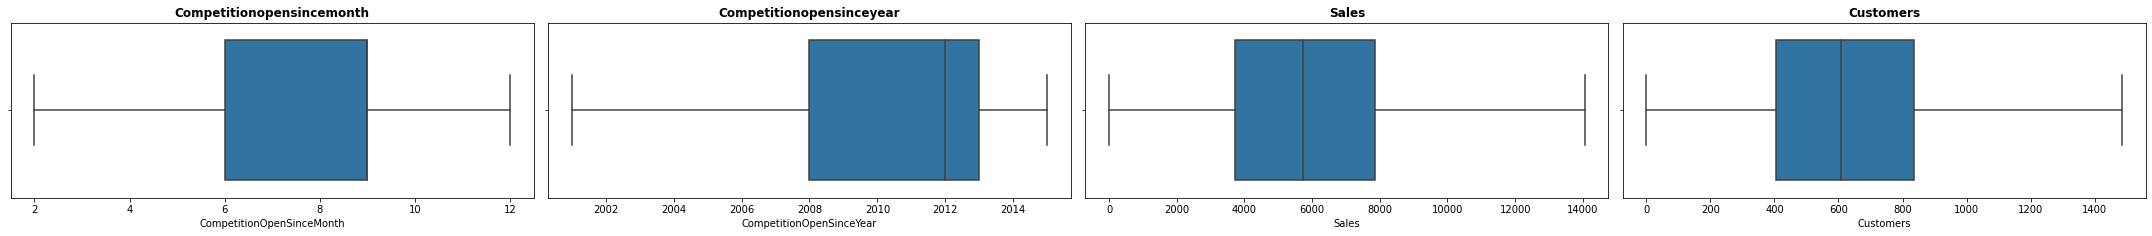

In [59]:
#Replotting the box plots and rechecking the percentage of outliers still available(if any) in the list of continous_value_feature.
plt.figure(figsize=(30,15))
for n,column in enumerate(outliners):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  float64       
 4   Customers                  1017209 non-null  float64       
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

What all outlier treatment techniques have you used and why did you use those techniques?
we have used the IQR method to do the outlier treatment, because there where too many outliers present, for which log transformation is not an appropriate method

The interquartile range (IQR) is a measure of dispersion that is used to identify and handle outliers in a dataset. It is defined as the difference between the 75th percentile and the 25th percentile of the data, and it is a robust measure of dispersion that is not affected by outliers.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [61]:
categorical_col=['StateHoliday','StoreType','Assortment','PromoInterval']

In [62]:
# checking the unique counts of object dype column which is essential to determine the type of encoding to be use in various column
for unique in categorical_col:
  print(f"{unique}: ")
  print(f"\tThe unique values are: {df[unique].unique()}")
  print(f"\tTotal number of unique values are: {df[unique].nunique()}")

StateHoliday: 
	The unique values are: ['0' 'a' 'b' 'c' 0]
	Total number of unique values are: 5
StoreType: 
	The unique values are: ['c' 'a' 'd' 'b']
	Total number of unique values are: 4
Assortment: 
	The unique values are: ['a' 'c' 'b']
	Total number of unique values are: 3
PromoInterval: 
	The unique values are: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
	Total number of unique values are: 4


In [63]:
# replacing "0" to 0 and a=b=c=1 for our simplicity as they resembles that there is holiday
df["StateHoliday"].replace({"0":0,"a":1, "b":1, "c":1}, inplace=True)

In [64]:
# rechecking the unique counts of object dype column which is essential to determine the type of encoding to be use in various column
for unique in categorical_col:
  print(f"{unique}: ")
  print(f"\tThe unique values are: {df[unique].unique()}")
  print(f"\tTotal number of unique values are: {df[unique].nunique()}")

StateHoliday: 
	The unique values are: [0 1]
	Total number of unique values are: 2
StoreType: 
	The unique values are: ['c' 'a' 'd' 'b']
	Total number of unique values are: 4
Assortment: 
	The unique values are: ['a' 'c' 'b']
	Total number of unique values are: 3
PromoInterval: 
	The unique values are: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
	Total number of unique values are: 4


We have given a project on linear regression so we have to take numerical values. But in our dataset we have some Categorical columns so we have to convert them in numerical for that we do create dummies column.

In [65]:
df_new=pd.get_dummies(df,columns=['StoreType','Assortment','PromoInterval','StateHoliday'],drop_first=True,dtype=int)

# code to see all the features
pd.set_option('display.max_columns', None)

# Let's see first five observations of our dataset
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",StateHoliday_1
0,1,5,2015-07-31,5263.0,555.0,1,1,1,1270,9.0,2008.0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,4,2015-07-30,5020.0,546.0,1,1,1,1270,9.0,2008.0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,3,2015-07-29,4782.0,523.0,1,1,1,1270,9.0,2008.0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,2,2015-07-28,5011.0,560.0,1,1,1,1270,9.0,2008.0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,1,2015-07-27,6102.0,612.0,1,1,1,1270,9.0,2008.0,0,0,0,0,1,0,0,0,0,0,0,0


In [66]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Store                           1017209 non-null  int64         
 1   DayOfWeek                       1017209 non-null  int64         
 2   Date                            1017209 non-null  datetime64[ns]
 3   Sales                           1017209 non-null  float64       
 4   Customers                       1017209 non-null  float64       
 5   Open                            1017209 non-null  int64         
 6   Promo                           1017209 non-null  int64         
 7   SchoolHoliday                   1017209 non-null  int64         
 8   CompetitionDistance             1017209 non-null  int64         
 9   CompetitionOpenSinceMonth       1017209 non-null  float64       
 10  CompetitionOpenSinceYear        1017209 no

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [67]:
# Manipulate Features to minimize feature correlation and create new features
# Extracting date, month and year from Date feature
df_new["Day"]= df_new["Date"].dt.day
df_new["Month"]= df_new["Date"].dt.month
df_new["Year"]= df_new["Date"].dt.year
df_new["Week"]= df_new["Date"].dt.week

# #Dropping Date feature from the dataset as we are gaining same information with extracted features
df_new.drop(columns=["Date"],inplace=True, axis=1)


In [68]:
df_new = df_new [df_new.Sales != 0]

#### 2. Feature Selection

In [69]:
# deriving 2 new features:
# 1. "CompetitionDuration -> Duration from which two stores are competiting"
# 2. "PromoDuration -> Duration from which the store is not involved in any promotion"
##    Final values are in Months.
df_new["CompetitionDuration"]= (df_new["Year"]-df_new["CompetitionOpenSinceYear"])*12 + (df_new["Month"]-df_new["CompetitionOpenSinceMonth"])
df_new["CompetitionDuration"] = df_new["CompetitionDuration"].map(lambda x: int(0) if x < 0 else int(x)).fillna(0)

# Creating PromoDuration feature
df_new["PromoDuration"]= ((df_new["Year"]-df_new["Promo2SinceYear"])*12 + (df_new["Week"]-df_new["Promo2SinceWeek"])*7/30.5)
df_new["PromoDuration"] = (df_new["PromoDuration"].map(lambda x: int(0) if x < 0 else int(x)).fillna(0)*df["Promo2"])

In [70]:
# Transform Your data
df_new.Open.value_counts()


1    844338
Name: Open, dtype: int64

In [71]:
df_new = df_new[df_new.Open != 0]

In [72]:
df_new.Open.value_counts()

1    844338
Name: Open, dtype: int64

In [73]:
# open is no more a variable hence we can drop it.
df_new=df_new.drop('Open', axis=1)

In [74]:
final_df = df_new.drop(["CompetitionOpenSinceMonth","CompetitionOpenSinceYear",'Promo2SinceWeek',"Promo2SinceYear" ] ,axis =1)

Now we can drop those 4 parameter because in place of them we have created new feature **CompetitionDuration** and **PromoDuration**.

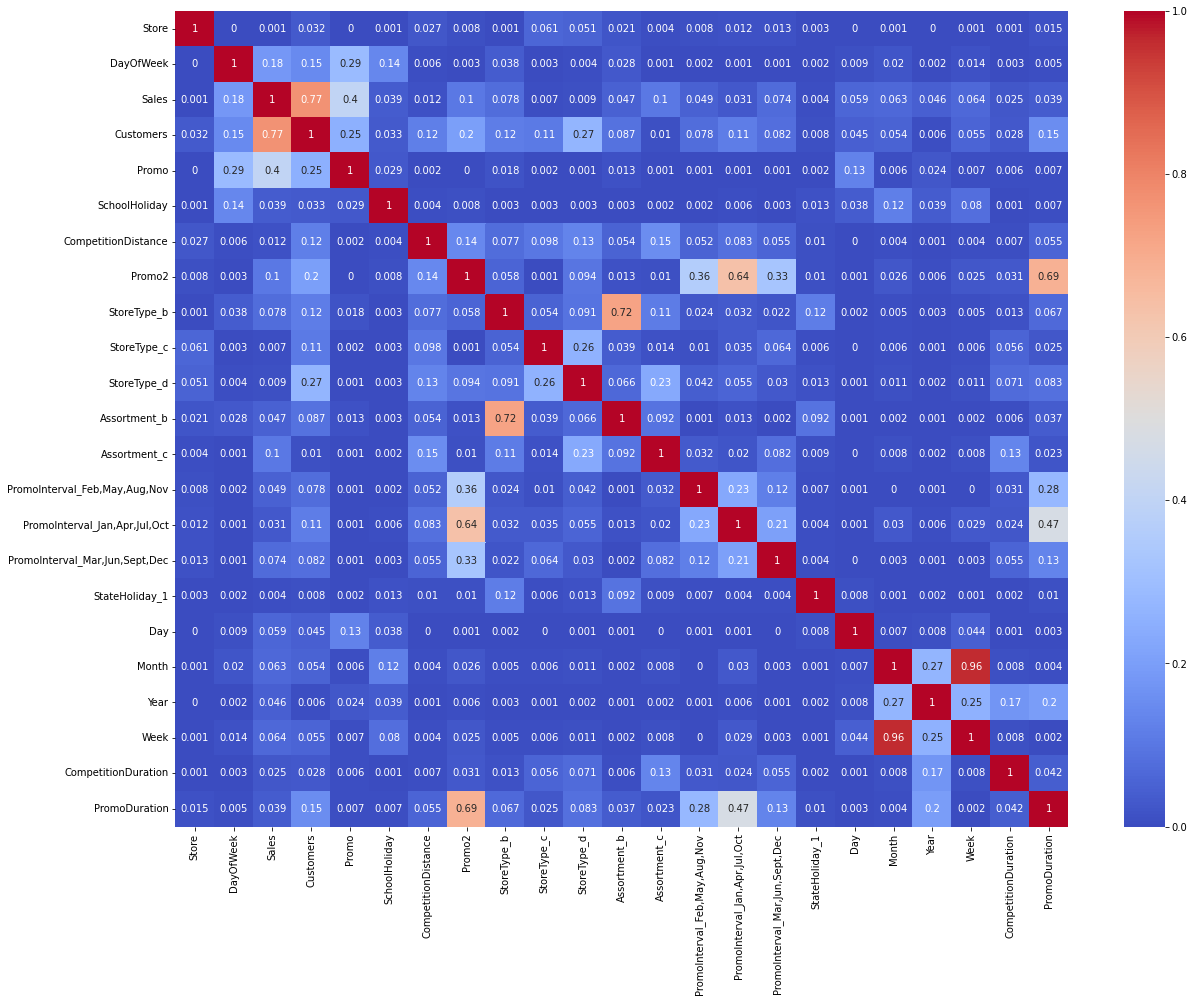

In [75]:
# DImensionality Reduction (If needed)
plt.figure(figsize=(20,15))
correlation = final_df.corr()
sns.heatmap(abs(round(correlation,3)), annot=True, cmap='coolwarm')
plt.show()

In [76]:
# after drawing heat map we conclude

In [77]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [78]:
# calculating the vif by excluding the redundant features("Sales -> Dependent variable" and "Store -> ID")
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ["Store", "Sales"]]])

,variables,VIF
0,DayOfWeek,5.809405
1,Customers,11.062720
2,Promo,2.137006
3,SchoolHoliday,1.307937
4,CompetitionDistance,1.625099
5,Promo2,inf
6,StoreType_b,2.193636
7,StoreType_c,1.277600
8,StoreType_d,1.787116
9,Assortment_b,2.123200


Promoduration and promo2 highly co-related and from the heat map we can see that **PromoDuration** less dependent on sale so we can remove it, To avoid multicolinearity. same Goes with **Assortment_b**, **PromoInterval_Jan,Apr,Jul,Oct**

In [79]:
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ["Store",'PromoDuration','Assortment_b', 'PromoInterval_Jan,Apr,Jul,Oct',"Sales"]]])

,variables,VIF
0,DayOfWeek,5.809385
1,Customers,11.058619
2,Promo,2.136784
3,SchoolHoliday,1.307936
4,CompetitionDistance,1.619197
5,Promo2,2.881946
6,StoreType_b,1.077317
7,StoreType_c,1.273740
8,StoreType_d,1.784547
9,Assortment_c,2.089572


As we can se Month and Week have high vif and almost similar so we can remove one of them again **Month** has High vif so we can remove it, Also **Year** is showing high stand alone vif so we can remove it as well

In [80]:
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ["Store",'Year','Month','PromoDuration','Assortment_b', 'PromoInterval_Jan,Apr,Jul,Oct',"Sales"]]])

,variables,VIF
0,DayOfWeek,4.287829
1,Customers,6.731241
2,Promo,2.063497
3,SchoolHoliday,1.260498
4,CompetitionDistance,1.551849
5,Promo2,2.662502
6,StoreType_b,1.077308
7,StoreType_c,1.268111
8,StoreType_d,1.684831
9,Assortment_c,2.068681


**Now our VIF is under 10 so we can proceed with these variables**

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

In [81]:
# Creating a variable containg continuous columns of final dataframe
Continuous_col=['Customers','CompetitionDistance','CompetitionDuration']

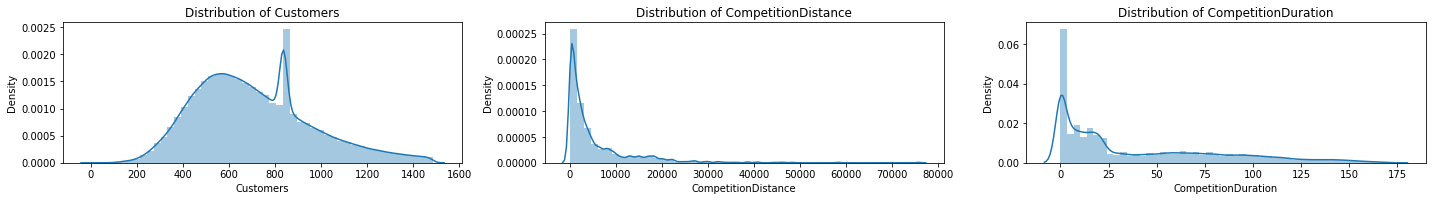

In [82]:
# Let's view the distribution of continuous columns
plt.figure(figsize=(20,5))
for n,col in enumerate(Continuous_col):
  plt.subplot(2,3,n+1)
  sns.distplot(final_df[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

In [83]:
# Applying transformation on the above considered columns

final_df['Customers']=(np.sqrt(final_df['Customers']))
final_df['CompetitionDistance']=(np.log1p(final_df['CompetitionDistance']))
final_df['PromoDuration']=(np.log1p(final_df['PromoDuration']))
final_df['CompetitionDuration']=(np.log1p(final_df['CompetitionDuration']))

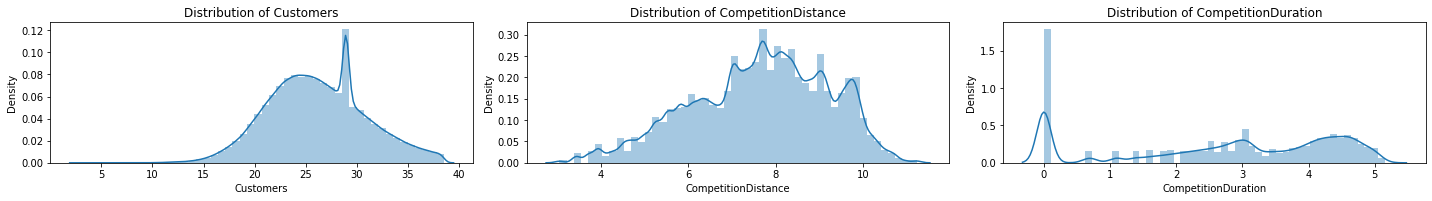

In [84]:
# Viewing the distribution above of above columns after applying transformation 
plt.figure(figsize=(20,5))
for n,col in enumerate(Continuous_col):
  plt.subplot(2,3,n+1)
  sns.distplot(final_df[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

The log10() function computes the value of the logarithm of argument x to base 10. The log1p() function computes the value of log(1+x) accurately even for tiny argument x. hence we used it 

### 6. Data Scaling

In [83]:
independent_variables=final_df[['DayOfWeek',"Customers","Promo","SchoolHoliday",'CompetitionDistance','Promo2',"StoreType_b",
                   "StoreType_c",'StoreType_d',"Assortment_c","PromoInterval_Mar,Jun,Sept,Dec",'PromoInterval_Feb,May,Aug,Nov',
                   'StateHoliday_1','Day','Week','CompetitionDuration']]

In [146]:
type(independent_variables)

pandas.core.frame.DataFrame

In [147]:
independent_variables.shape

(844338, 16)

In [84]:
dependent_variable = final_df['Sales']

In [92]:
type(final_df['DayOfWeek'])

pandas.core.series.Series

In [85]:
# Scaling your data
# Scaling our final dataframe
# Importing StandardScaler library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(independent_variables)
y = dependent_variable

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

In [94]:
# Creating object
regressor= StandardScaler()
# Fit and Transform
x = regressor.fit_transform(x)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

##### What data splitting ratio have you used and why? 

In [95]:
print(x.shape)
print(y.shape)

(844338, 16)
(844338, 1)


In [96]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0) 
print(x_train.shape)
print(x_test.shape)

(675470, 16)
(168868, 16)


In [97]:
# Checking the shape after spliting
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((675470, 16), (168868, 16), (675470, 1), (168868, 1))

In [98]:
type(y_train)

pandas.core.frame.DataFrame

What data splitting ratio have you used and why?
1. training set - 80%
2. test set - 20%

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

# ***7. ML Model Implementation***

## ML Model - 1 Linear regression

In [149]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)

# Fit the Algorithm


# Predict on the model
y_train_pred = reg.predict(x_train)
y_test_pred = reg.predict(x_test)

In [ ]:
reg.score(x_train,y_train)

0.8315858580495602

In [ ]:
reg.coef_

array([[ -28.2325374 , 3018.34656381,  463.56822042,    8.85274291,
         408.36290422,  247.64903292, -550.58401853,  -83.28169926,
         503.69109263,  126.75471573,  -55.52210091,  -26.47267093,
          15.86750585,   16.64672158,   62.78717502,   57.52225358]])

In [ ]:
reg.intercept_

array([6955.28326987])

In [ ]:
# Importing essential libraries to check the accuracy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
# from sktime.performance_metrics.forecasting import MeanSquaredPercentageError

In [ ]:
# Calculating the various errors
def regression_metrics(y_train_actual,y_train_pred,y_test_actual,y_test_pred):
  MAE_train= mean_absolute_error(y_train,y_train_pred)
  print("MAE on train is:" ,MAE_train)
  MAE_test= mean_absolute_error(y_test,y_test_pred)
  print("MAE on test is:" ,MAE_test)
  print("\n")


  MSE_train= mean_squared_error(y_train, y_train_pred)
  print("MSE on train is:" ,MSE_train)
  MSE_test  = mean_squared_error(y_test, y_test_pred)
  print("MSE on test is:" ,MSE_test)
  print("\n")


  RMSE_train = np.sqrt(MSE_train)
  print("RMSE on train is:" ,RMSE_train)
  RMSE_test = np.sqrt(MSE_test)
  print("RMSE on test is:" ,RMSE_test)
  print("\n")

  ## mean_absolute_percentage_error
  MAPE_train = mean_absolute_percentage_error(y_train, y_train_pred)* 100
  print("MAPE on train is:" ,MAPE_train,"%")
  MAPE_test = mean_absolute_percentage_error(y_test, y_test_pred)* 100
  print("MAPE on test is:" ,MAPE_test,'%')
  print("\n")

  ## r2_score
  R2_train= r2_score(y_train,y_train_pred)
  print("R2 on train is:" ,R2_train)  
  R2_test= r2_score(y_test,y_test_pred)
  print("R2 on test is:" ,R2_test)
  print("\n")

  Accuracy_train= 100- MAPE_train
  print("Accuracy of train is:" ,Accuracy_train,'%')
  Accuracy_test= 100- MAPE_test
  print("Accuracy of test is:" ,Accuracy_test,'%')
  print("\n")
  

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Calculating the regression metrics
regression_metrics(y_train,y_train_pred,y_test,y_test_pred)

MAE on train is: 935.3600781877726
MAE on test is: 933.3535256914585


MSE on train is: 1624334.349318206
MSE on test is: 1617681.4363367418


RMSE on train is: 1274.4937619769687
RMSE on test is: 1271.881062181815


MAPE on train is: 14.834353056107464 %
MAPE on test is: 14.752703685655128 %


R2 on train is: 0.8315858580495602
R2 on test is: 0.8312942147543553


Accuracy of train is: 85.16564694389254 %
Accuracy of test is: 85.24729631434488 %




In [ ]:
final_df['Sales'].sample(10)

490561     2185
858109     4650
857285     3385
143707    12751
986722     7101
753052    10413
719694     7505
620117     2708
61455      8987
447066     7356
Name: Sales, dtype: int64

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

## ML Model - 2 (LASSO)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0001, max_iter=3000)
# Fit the Lasso model
lasso.fit(x_train, y_train)
# Create the model score
print(lasso.score(x_test, y_test), lasso.score(x_train, y_train))

0.7122781098059614 0.7087138330433531


In [ ]:
#get the x_train and x-test value
y_train_pred_lasso=lasso.predict(x_train)
y_test_pred_lasso=lasso.predict(x_test)

In [ ]:
regression_metrics(y_train,y_train_pred_lasso,y_test,y_test_pred_lasso)

MAE on train is: 933.7231620877972
MAE on test is: 931.399184286995


MSE on train is: 1730281.9934849376
MSE on test is: 1717782.100758063


RMSE on train is: 1315.4018372668245
RMSE on test is: 1310.6418659412886


MAPE on train is: 14.628172393297323 %
MAPE on test is: 14.523961269034787 %


R2 on train is: 0.7087138330433531
R2 on test is: 0.7122781098059614


Accuracy of train is: 85.37182760670268 %
Accuracy of test is: 85.47603873096521 %




#### 2. Cross- Validation & Hyperparameter Tuning

## RIDGE

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)
     

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -1730447.8631738152


In [ ]:
y_train_pred_ridge = ridge_regressor.predict(x_train)
y_test_pred_ridge = ridge_regressor.predict(x_test)

In [ ]:
regression_metrics(y_train,y_train_pred_ridge,y_test,y_test_pred_ridge)

MAE on train is: 933.7236251690955
MAE on test is: 931.3997740663169


MSE on train is: 1730281.9947555983
MSE on test is: 1717782.622208362


RMSE on train is: 1315.4018377498178
RMSE on test is: 1310.642064870635


MAPE on train is: 14.62814791271848 %
MAPE on test is: 14.523939967051517 %


R2 on train is: 0.7087138328294424
R2 on test is: 0.7122780224650433


Accuracy of train is: 85.37185208728152 %
Accuracy of test is: 85.47606003294848 %




##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

## ML Model - 3 (**DecisionTreeRegression**)

NOW we need to create 2 new variable D and I in place of x and y 

In [ ]:
# ML Model - 3 Implementation

# Visualizing evaluation Metric Score chart
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
%matplotlib inline
     
# Fit the Algorithm

# Predict on the model

In [ ]:
tree_regressor = DecisionTreeRegressor(max_depth=15)
tree_regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=15)

In [ ]:
y_train_pred_DT = tree_regressor.predict(x_train)
y_train_pred_DT

array([5913.65397924, 5449.18181818, 3854.14285714, ..., 9381.88888889,
       7462.07033639, 7420.15479115])

In [ ]:
y_test_pred_DT = tree_regressor.predict(x_test)
y_test_pred_DT

array([8353.9625    , 5207.20325203, 7145.17037037, ..., 8754.21111111,
       9312.64393939, 8478.5       ])

In [ ]:
regression_metrics(y_train,y_train_pred_DT,y_test,y_test_pred_DT)

MAE on train is: 529.4676545677926
MAE on test is: 584.3388701146724


MSE on train is: 640569.1220779184
MSE on test is: 761958.0163761602


RMSE on train is: 800.3556222567056
RMSE on test is: 872.902065741719


MAPE on train is: 7.841988498002224 %
MAPE on test is: 8.670286537146296 %


R2 on train is: 0.8921627081924057
R2 on test is: 0.8723749650066204


Accuracy of train is: 92.15801150199778 %
Accuracy of test is: 91.3297134628537 %




#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

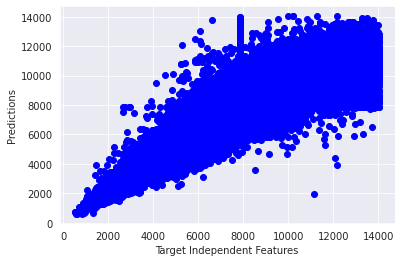

In [ ]:
# Visualizing evaluation Metric Score chart

predictions = tree_regressor.predict(x_test)

# Calculate the evaluation score using a metric of your choice
# For example, let's use mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)

# Plot the predictions against the ground truth labels
plt.plot(y_test, predictions, "bo")
plt.xlabel("Target Independent Features")
plt.ylabel("Predictions")

# Show the plot
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# Fit the Algorithm
param_grid = {
    'max_depth': [11, 13, 15,17],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the model
model = DecisionTreeRegressor()

# Fit the Algorithm

# Predict on the model

In [ ]:

# Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=5)

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [11, 13, 15, 17],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:

y_train_pred_DT_cv = grid_search.predict(x_train)
y_train_pred_DT_cv
     
y_test_pred_DT_cv = grid_search.predict(x_test)
y_test_pred_DT_cv

array([8287.21428571, 5356.84615385, 7699.84507042, ..., 9900.75      ,
       9512.875     , 8182.44444444])

In [ ]:
regression_metrics(y_train,y_train_pred_DT_cv,y_test,y_test_pred_DT_cv)

MAE on train is: 438.59228069205693
MAE on test is: 519.2438739851438


MSE on train is: 482127.93362997606
MSE on test is: 655729.0277075904


RMSE on train is: 694.3543285887804
RMSE on test is: 809.7709723789748


MAPE on train is: 6.4489754703078415 %
MAPE on test is: 7.664031130509118 %


R2 on train is: 0.9188356589858792
R2 on test is: 0.8901679117369616


Accuracy of train is: 93.55102452969216 %
Accuracy of test is: 92.33596886949088 %




## **ML Model 4 (xgBoost Regression)**

In [100]:
import xgboost as xg

In [ ]:
xgb_reg = xg.xGBRegressor(learning_rate=0.20, max_depth=10)

In [ ]:
# fitting the model
xgb_reg.fit(x_train,y_train)

[09:24:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.2, max_depth=10)

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart

In [ ]:
print(f"The r2 score for testing is {round(r2_score(y_test,xgb_reg.predict(x_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,xgb_reg.predict(x_train)),4)}")

The r2 score for testing is 0.9777
The r2 score for training is 0.9828


In [ ]:
y_train_pred_xgb = xgb_reg.predict(x_train)
y_test_pred_xgb = xgb_reg.predict(x_test)


In [ ]:
regression_metrics(y_train,y_train_pred_xgb,y_test,y_test_pred_xgb)

MAE on train is: 295.70684261527873
MAE on test is: 325.44214157547975


MSE on train is: 165638.7644536929
MSE on test is: 213988.20244365153


RMSE on train is: 406.98742542453675
RMSE on test is: 462.58858875209137


MAPE on train is: 4.545096110002168 %
MAPE on test is: 4.927855851295336 %


R2 on train is: 0.9828262510111242
R2 on test is: 0.9776834629392104


Accuracy of train is: 95.45490388999784 %
Accuracy of test is: 95.07214414870467 %




### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# import ridgeregression from sklearn library and RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Creating xGBoost instance
xgb= xg.xGBRegressor()

# Defining parameters
parameters={"learning_rate":[0.15,0.20],"max_depth":[10,12]}

# Train the model
xgbR= GridSearchCV(xgb,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=3)
xgbR.fit(x_train,y_train)

# Predict the output
y_train_grid_xgb_pred = xgbR.predict(x_train)
y_test_grid_xgb_pred = xgbR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {xgbR.best_params_}")
print(f"Negative mean square error is: {xgbR.best_score_}")

# Calculating Regression Metrics using GridSearchCV in RandomForestRegressor
regression_metrics(y_train,y_train_grid_xgb_pred,y_test,y_test_grid_xgb_pred)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


KeyboardInterrupt: ignored

## **MODEL 5 (LIGHT GBM)**

In [ ]:
# importing essential library
import lightgbm as lgb
# Similarly LGBMRegressor can also be imported for a regression model.
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor

In [ ]:
# creating an object for model
lgbmR = LGBMRegressor(boosting_type='gbdt', max_depth=120, learning_rate=0.1, n_estimators=500,  n_jobs=-1) 

In [ ]:
# fit the regressor with x and Y data
lgbmR.fit(x_train, y_train)

LGBMRegressor(max_depth=120, n_estimators=500)

In [ ]:
# Predicting the Target variable
y_train_pred_lgb = lgbmR.predict(x_train)
y_test_pred_lgb = lgbmR.predict(x_test)

In [ ]:
# Calculating Regression Metrics using LightGbm
regression_metrics(y_train, y_train_pred_lgb, y_test, y_test_pred_lgb)

MAE on train is: 411.9347650636411
MAE on test is: 416.9920354140689


MSE on train is: 331620.1741992711
MSE on test is: 342351.726361578


RMSE on train is: 575.8647186616585
RMSE on test is: 585.1083031042868


MAPE on train is: 6.281126147121624 %
MAPE on test is: 6.327089089536206 %


R2 on train is: 0.9656169758925139
R2 on test is: 0.9642966065328519


Accuracy of train is: 93.71887385287837 %
Accuracy of test is: 93.6729109104638 %




### 2. Cross- Validation & Hyperparameter Tuning

### **Explain the ML Model used and it's performance using Evaluation metric Score Chart**

## **MODEL 6 (Random Forest regression)**

In [ ]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor 
  
# create a regressor object
RF_TreeR = RandomForestRegressor(n_estimators=50, max_depth=15) 
  
# fit the regressor with x and Y data
RF_TreeR.fit(x_train, y_train)

# predict the model
y_train_RFtree_pred= RF_TreeR.predict(x_train)
y_test_RFtree_pred= RF_TreeR.predict(x_test)

In [ ]:
# Calculating Regression Metrics using RandomForestRegressor
regression_metrics(y_train,y_train_RFtree_pred,y_test,y_test_RFtree_pred)

MAE on train is: 462.485031992905
MAE on test is: 504.8947066344567


MSE on train is: 420911.7260286229
MSE on test is: 517337.33780192997


RMSE on train is: 648.7771004194144
RMSE on test is: 719.2616615682571


MAPE on train is: 6.948957010780423 %
MAPE on test is: 7.496083878984992 %


R2 on train is: 0.956359054276145
R2 on test is: 0.9460475963621073


Accuracy of train is: 93.05104298921958 %
Accuracy of test is: 92.50391612101501 %




### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


# # Creating Ridge instance
RF_tree= RandomForestRegressor()


# # Defining parameters
parameters= {'n_estimators':[40,50,100], 'max_depth': [15,17,20], 'min_samples_leaf': [1, 2]}


# # Train the model
RF_treeR = RandomizedSearchCV(RF_tree, parameters, n_iter=5, n_jobs=-1, scoring='neg_mean_squared_error', cv=3,  verbose=3)
RF_treeR.fit(x_train,y_train)


# # Predict the output
y_train_grid_RFtree_pred = RF_treeR.predict(x_train)
y_test_grid_RFtree_pred = RF_treeR.predict(x_test)


# # Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {RF_treeR.best_params_}")
print(f"Negative mean square error is: {RF_treeR.best_score_}")



Fitting 3 folds for each of 5 candidates, totalling 15 fits
The best alpha value found out to be: {'n_estimators': 100, 'min_samples_leaf': 2, 'max_depth': 20}
Negative mean square error is: -349464.0345142922


In [ ]:
# Calculating Regression Metrics using GridSearchCV in RandomForestRegressor
regression_metrics(y_train,y_train_grid_RFtree_pred,y_test,y_test_grid_RFtree_pred)

MAE on train is: 250.69733839178957
MAE on test is: 372.26500618480065


MSE on train is: 139604.19035736765
MSE on test is: 310940.4212070757


RMSE on train is: 373.63644142049054
RMSE on test is: 557.6203199373887


MAPE on train is: 3.7320402675530246 %
MAPE on test is: 5.474659985505024 %


R2 on train is: 0.9855255662471273
R2 on test is: 0.9675724486007939


Accuracy of train is: 96.26795973244697 %
Accuracy of test is: 94.52534001449497 %




## **EXPLAIN MODEL**

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your df prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

You can approach explainability in two ways

1. Globally
2. Locally

Globally we have discussed earlier like LINEAR REGRESSION now we will work on locally 

**LIME**: Local Interpretable Model-Agnostic Explanations

We have used **xgboost** in our model it gives highest **accuracy of 95%** on test data set also **MAPE of 4%**, which is under 5 and quite good for our model.
WE know it is difficult to explain the Xgboost because it is a Black Box model, So its difficult to explain these models, but we will try to explain it with the heplp of **LIME** Explainer which takes account the value of R2 score  which is **0.98** in our model, quite good to explain with the help of LIME. 

In [102]:
# Firstly we will install LIME 
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=adbcedab22f3ecba8ec361543fce48907985b528c6dacb3f7dc59945157db684
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [85]:
# Importing required library for LIME model
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
from __future__ import print_function
from xgboost import XGBClassifier


In [151]:
type(final_df)

pandas.core.frame.DataFrame

In [ ]:
final_df.info()

In [120]:
final_df.shape

(844338, 25)

In [86]:
# Train-80%, Test-20%
train_df=final_df.loc[0:675470]
test_df=final_df.loc[675470:]

In [ ]:
test_df.info()

In [ ]:
train_df.info()

In [87]:
# Drop unwanted columns
train_df = train_df.drop(['Store',],axis=1)
# Extract the column values
train_target = np.ravel(np.array(train_df['Sales'].values))
train_df = train_df.drop(['Sales'],axis=1)

In [88]:
# Extract features
float_columns=[]
cat_columns=[]
int_columns=[]

In [ ]:
train_df.info()

In [90]:
# Putting features into respective float, cat , int list.
for i in train_df.columns:
    if train_df[i].dtype == 'float' : 
        float_columns.append(i)
    elif train_df[i].dtype == 'int64':
        int_columns.append(i)
    elif train_df[i].dtype == 'object':
        cat_columns.append(i)

In [91]:
train_cat_features = train_df[cat_columns]
train_float_features = train_df[float_columns]
train_int_features = train_df[int_columns]

In [94]:
train_cat_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561023 entries, 0 to 675470
Empty DataFrame

In [ ]:
train_int_features.info()

In [ ]:
train_float_features.info()

Since we dont have categorical values as of Now so we are skipping it.

In [95]:
train_transformed_features = np.concatenate((train_float_features,train_int_features),axis=1)
train_transformed_features = pd.DataFrame(data=train_transformed_features)

In [96]:
# Getting final X and Y 
array = train_transformed_features.values
number_of_features = len(array[0])
X = array[:,0:number_of_features]
Y = train_target

In [101]:
number_of_features

21

In [102]:
X.shape

(561023, 21)

In [103]:
# Split into training and validation set
from sklearn.model_selection import train_test_split
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [104]:
scoring = 'accuracy'

In [ ]:
# Model 1 - RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, Y_train)
print(" Random Forest Accuracy =",accuracy_score(Y_validation, model_rf.predict(X_validation)))

In [ ]:
# Model 2 - XGB Classifier
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, Y_train)
print("Xgboost Accuracy =",accuracy_score(Y_validation, model_xgb.predict(X_validation)))

Xgboost Accuracy = 0.7239392352016762


In [ ]:
predict_fn_xgb = lambda x: model_xgb.predict_proba(x).astype(float)

In [ ]:
type(independent_variables)

pandas.core.frame.DataFrame

In [ ]:
type(y_train)

pandas.core.frame.DataFrame

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
# Create the LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train ,feature_names = independent_variables,class_names=['1','2','3'])
                                                   

In [ ]:
# Pick the observation in the validation set for which explanation is required
observation_1 = 2

In [ ]:
y_test_pred_xgb = tuple(y_test_pred_xgb)

In [ ]:
type(y_test_pred_xgb)

tuple

In [ ]:
# Get the explanation for Xgboost
exp = explainer.explain_instance(X_test[observation_1], y_test_pred_xgb)
exp.show_in_notebook(show_all=False)

Feature importance Explainer

In [ ]:
# feature importance
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
importances = clf.feature_importances_

NameError: ignored

In [ ]:
# Compute permutation importance
result = permutation_importance(clf, X, y, n_repeats=10, random_state=0)

In [ ]:
for i, feature in enumerate(final_df.independent_variables):
    print(f'{feature}: {result.importances[i]}')

Feature Importance from Tree-based models: Tree-based models such as decision trees and random forests provide feature importance measures that are based on the number of times a feature is used to split the tree and the decrease in impurity at each split.

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***